*   Завантажити датасет, що вкладений у розшареній папці. Датасет представляє собою денні мінімальні температури в місті Мельбурні за 10 років.
*   Створити DataFrame в якому кожен стовпець відповідає одному року.
*   Проаналізувати DataFrame на валідність. Якщо є NaN, то замінити на середнє арифметичне цього дня по роках. (Тобто, якщо 12.04.1082 року у вас NaN, то ви шукаєте середнє арифметичне по 12.04 інших років)
*   Визначити три роки, коли середня температура взимку була найвищою. Вивести ці роки на графік. На окремому графіку зобразити лише зимовий період цих років.
*   Визначити літо якого року було найтеплішим та найхолоднішим (середня сезонна температура) та зобразити їх на графіку.


Імпорт бібліотек

In [2]:
import numpy as np
import pandas as pd
import io

Завантажити датасет, що вкладений у розшареній папці. Датасет представляє собою денні мінімальні температури в місті Мельбурні за 10 років.

In [25]:
from google.colab import files
uploaded = files.upload()

Saving tasks.csv to tasks.csv


In [26]:
df = pd.read_csv(io.BytesIO(uploaded["tasks.csv"]))
df.columns = ["task"]
df

,task
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5
1990-12-30,15.7


Створити DataFrame в якому кожен стовпець відповідає одному року.


In [27]:
df1 = pd.DataFrame([], columns=list(range(1981, 1991)))
for t in range(1981, 1991):
  df1[t] = [float(df["task"][s]) for s in df.index if int(s.split("-")[0]) == t]
df1.index = [i[5:] for i in df.index[:365]]
df1

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
01-01,20.7,17.0,18.4,19.5,13.3,12.9,12.3,15.3,14.3,14.8
01-02,17.9,15.0,15.0,17.1,15.2,13.8,13.8,14.3,17.4,13.3
01-03,18.8,13.5,10.9,17.1,13.1,10.6,15.3,13.5,18.5,15.6
01-04,14.6,15.2,11.4,12.0,12.7,12.6,15.6,15.0,16.8,14.5
01-05,15.8,13.0,14.8,11.0,14.6,13.7,16.2,13.6,11.5,14.3
...,...,...,...,...,...,...,...,...,...,...
12-27,15.5,15.3,13.9,12.2,11.5,14.6,16.2,9.5,13.3,14.0
12-28,13.3,16.3,11.1,12.0,10.8,14.2,14.2,12.9,11.7,13.6
12-29,15.6,15.8,16.1,12.6,12.0,13.2,14.3,12.9,10.4,13.5
12-30,15.2,17.7,20.4,16.0,16.3,11.7,13.3,14.8,14.4,15.7


Проаналізувати DataFrame на валідність. Якщо є NaN, то замінити на середнє арифметичне цього дня по роках. (Тобто, якщо 12.04.1082 року у вас NaN, то ви шукаєте середнє арифметичне по 12.04 інших років)

In [28]:
df1.all()

1981     True
1982    False
1983    False
1984     True
1985     True
1986     True
1987     True
1988     True
1989     True
1990     True
dtype: bool

Визначити три роки, коли середня температура взимку була найвищою Вивести ці роки на графік. На окремому графіку зобразити лише зимовий період цих років.

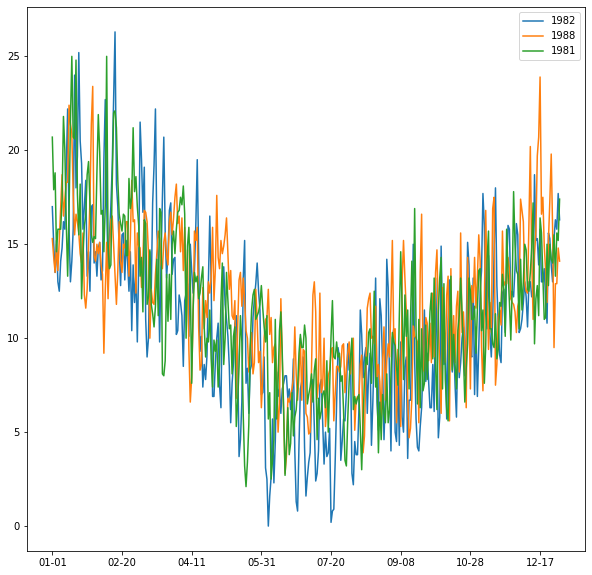

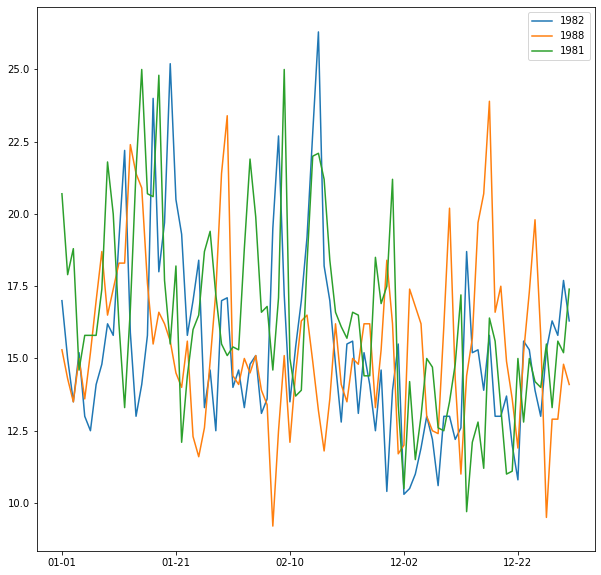

In [34]:
w = pd.concat([df1.loc["01-01":"02-28", :], df1.loc["12-01":]])
t_w_w = w.mean().sort_values().tail(3)
indx = t_w_w.index
df1[indx].plot(figsize=(10,10))
w[indx].plot(figsize=(10,10))

Визначити літо якого року було найтеплішим та найхолоднішим (середня сезонна температура) та зобразити їх на графіку.

Найхолодніше літо :  1982 , t = 6.055434782608699
Найтепліше літо:  1988 , t = 8.405434782608697


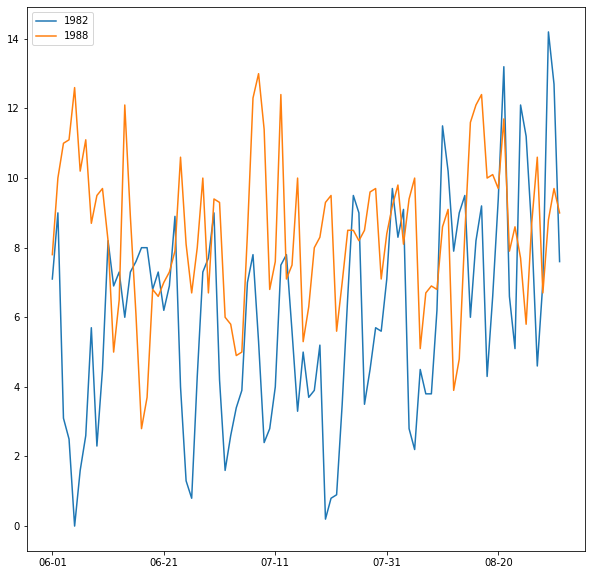

In [41]:
s = df1.loc["06-01":"08-31", :]
mean_t = s.mean()
coldest_s = mean_t.idxmin()
warmest_s = mean_t.idxmax()
print("Найхолодніше літо : ", coldest_s, ", t =", mean_t[coldest_s])
print("Найтепліше літо: ", warmest_s, ", t =", mean_t[warmest_s])
s[[coldest_s, warmest_s]].plot(figsize=(10,10))